# Neo4J GDS 

# https://neo4j.com/docs/graph-data-science/current/
# https://sandbox.neo4j.com/

# Neo4J Desktop
https://neo4j.com/download/?utm_source=Google&utm_medium=PaidSearch&utm_campaign=Evergreenutm_content=EMEA-Search-SEMBrand-Evergreen-None-SEM-SEM-NonABM&utm_term=download%20neo4j&utm_adgroup=download&gad_source=1&gclid=Cj0KCQjw2a6wBhCVARIsABPeH1t3pAeOoe18bEQl_OCbOs57ZGG9Kbbx6EOc9iJgi8OdF8KZk1e7-qQaArDwEALw_wcB

# https://neo4j.com/graphgists/international-flights-database/

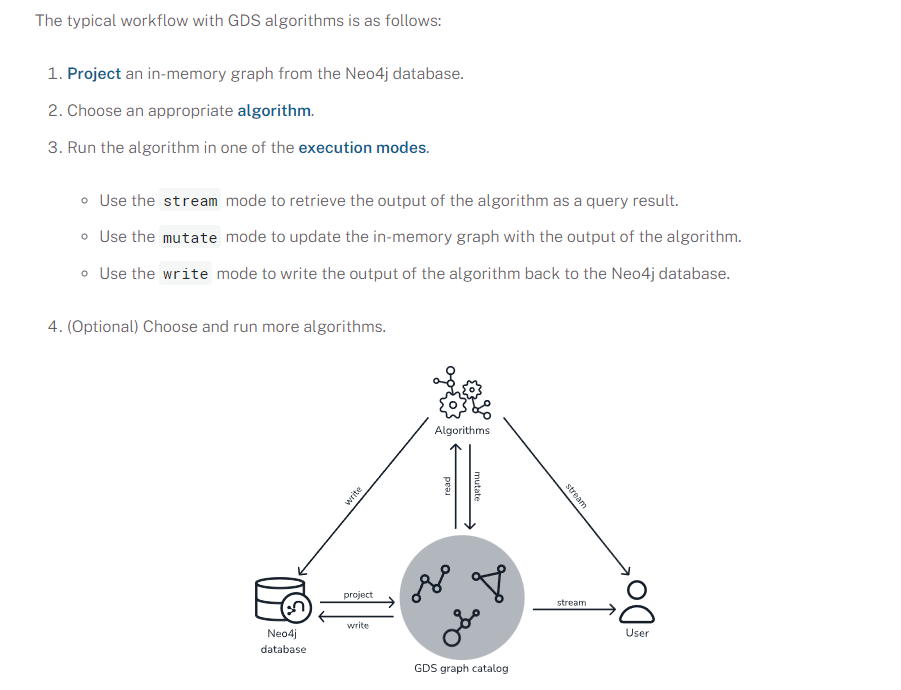

In [7]:
from dotenv import dotenv_values
config = dotenv_values(".env")

In [52]:
from langchain.graphs import Neo4jGraph

graph = Neo4jGraph(
    url="bolt://184.72.104.115:7687",
    username="neo4j",
    password="driller-address-lantern"
)

r = graph.query("""MATCH (n:Airport {city:"Los Angeles"}) RETURN n""")
print(r)

[{'n': {'altitude': 127, 'descr': 'Los Angeles International Airport', 'longest': 12091, 'iata': 'LAX', 'city': 'Los Angeles', 'icao': 'KLAX', 'location': POINT(-118.4079971 33.94250107), 'id': '13', 'pagerank': 8.193558075446687, 'runways': 4}}]


In [53]:
print(graph.schema)

Node properties are the following:
Airport {longest: INTEGER, altitude: INTEGER, pagerank: FLOAT, descr: STRING, runways: INTEGER, id: STRING, icao: STRING, city: STRING, location: POINT, iata: STRING},City {name: STRING},Region {name: STRING},Country {code: STRING},Continent {name: STRING}
Relationship properties are the following:
HAS_ROUTE {distance: INTEGER},PATH {costs: LIST, totalCost: FLOAT, nodeIds: LIST}
The relationships are the following:
(:Airport)-[:IN_CITY]->(:City),(:Airport)-[:IN_COUNTRY]->(:Country),(:Airport)-[:IN_REGION]->(:Region),(:Airport)-[:ON_CONTINENT]->(:Continent),(:Airport)-[:HAS_ROUTE]->(:Airport),(:Airport)-[:PATH]->(:Airport),(:City)-[:IN_COUNTRY]->(:Country),(:City)-[:IN_REGION]->(:Region),(:City)-[:ON_CONTINENT]->(:Continent),(:Region)-[:ON_CONTINENT]->(:Continent),(:Region)-[:IN_COUNTRY]->(:Country),(:Country)-[:ON_CONTINENT]->(:Continent)


In [54]:
r = graph.query("""MATCH p=()-[r:IN_COUNTRY]->() RETURN p """)
print(r)

[{'p': [{'descr': 'Hartsfield - Jackson Atlanta International Airport', 'altitude': 1026, 'longest': 12390, 'iata': 'ATL', 'city': 'Atlanta', 'icao': 'KATL', 'location': POINT(-84.4281005859375 33.6366996765137), 'id': '1', 'pagerank': 10.389948350302957, 'runways': 5}, 'IN_COUNTRY', {'code': 'US'}]}, {'p': [{'altitude': 151, 'descr': 'Anchorage Ted Stevens', 'longest': 12400, 'iata': 'ANC', 'city': 'Anchorage', 'icao': 'PANC', 'location': POINT(-149.996002197266 61.1744003295898), 'id': '2', 'pagerank': 2.6511572538139374, 'runways': 3}, 'IN_COUNTRY', {'code': 'US'}]}, {'p': [{'descr': 'Austin Bergstrom International Airport', 'altitude': 542, 'longest': 12250, 'iata': 'AUS', 'city': 'Austin', 'icao': 'KAUS', 'location': POINT(-97.6698989868164 30.1944999694824), 'id': '3', 'pagerank': 3.397036170922171, 'runways': 2}, 'IN_COUNTRY', {'code': 'US'}]}, {'p': [{'altitude': 599, 'descr': 'Nashville International Airport', 'longest': 11030, 'iata': 'BNA', 'city': 'Nashville', 'icao': 'KBNA

In [55]:
len(r)

8439

In [56]:
r[-1]

{'p': [{'name': 'DE-BB'}, 'IN_COUNTRY', {'code': 'DE'}]}

In [57]:
r = graph.query("""MATCH (p:City)-[r:IN_COUNTRY]->(s:Country{code:"US"}) RETURN p """)
print(r)

[{'p': {'name': 'Key West'}}, {'p': {'name': 'West Palm Beach'}}, {'p': {'name': 'Tin City'}}, {'p': {'name': 'Ambler'}}, {'p': {'name': 'El Paso'}}, {'p': {'name': 'Santa Rosa'}}, {'p': {'name': 'Shungnak'}}, {'p': {'name': 'Evansville'}}, {'p': {'name': 'Ogden'}}, {'p': {'name': 'Baltimore'}}, {'p': {'name': 'Columbus'}}, {'p': {'name': 'Telluride'}}, {'p': {'name': 'Fresno'}}, {'p': {'name': 'Plattsburgh'}}, {'p': {'name': 'Valparaiso'}}, {'p': {'name': 'Marquette'}}, {'p': {'name': 'Kalskag'}}, {'p': {'name': 'Cordova'}}, {'p': {'name': 'Helena'}}, {'p': {'name': 'Hilo'}}, {'p': {'name': 'Hoonah'}}, {'p': {'name': 'Mc Allen'}}, {'p': {'name': 'Burbank'}}, {'p': {'name': 'Kalamazoo'}}, {'p': {'name': 'Eugene'}}, {'p': {'name': 'Stockton'}}, {'p': {'name': 'Dubuque'}}, {'p': {'name': 'Kiana'}}, {'p': {'name': 'Venetie'}}, {'p': {'name': 'Arcata/Eureka'}}, {'p': {'name': 'Bristol/Johnson/Kingsport'}}, {'p': {'name': 'Springfield'}}, {'p': {'name': 'Providence'}}, {'p': {'name': 'Centr

In [58]:
len(r)

553

In [59]:
r[-1]

{'p': {'name': 'Hana'}}

# Create Projection

In [ ]:
# Call gds.graph.drop("AirportGraph")

In [60]:
r = graph.query("""CALL gds.graph.project(
  'AirportGraph',
  'Airport',
  'HAS_ROUTE',
  {
    relationshipProperties: 'distance'
  }
)""")

print(r)

[{'nodeProjection': {'Airport': {'label': 'Airport', 'properties': {}}}, 'relationshipProjection': {'HAS_ROUTE': {'aggregation': 'DEFAULT', 'orientation': 'NATURAL', 'indexInverse': False, 'properties': {'distance': {'aggregation': 'DEFAULT', 'property': 'distance', 'defaultValue': None}}, 'type': 'HAS_ROUTE'}}, 'graphName': 'AirportGraph', 'nodeCount': 3503, 'relationshipCount': 46389, 'projectMillis': 490}]


# Run the algorithm in stream mode

A good first candidate algorithm to calculate the shortest path in a graph is the Dijkstra Source-Target Shortest Path algorithm. To try it out, use it with the stream mode to see the result in the query output.

In [61]:
r = graph.query("""MATCH
  (source:Airport {iata: 'RDU'}), 
  (target:Airport {iata: 'AXT'})
CALL gds.shortestPath.dijkstra.stream(
  'AirportGraph',
  {
    sourceNode: source,
    targetNode: target,
    relationshipWeightProperty: 'distance'
  }
)
YIELD
  index,
  sourceNode,
  targetNode,
  totalCost,
  path
RETURN
  index,
  gds.util.asNode(sourceNode).name AS sourceNodeName,
  gds.util.asNode(targetNode).name AS targetNodeName,
  totalCost,
  nodes(path) AS path
ORDER BY index
""")

print(r)

[{'index': 0, 'sourceNodeName': None, 'targetNodeName': None, 'totalCost': 7213.0, 'path': [{'altitude': 435, 'descr': 'Raleigh-Durham', 'longest': 10000, 'iata': 'RDU', 'city': 'Raleigh', 'icao': 'KRDU', 'location': POINT(-78.7874984741211 35.8776016235352), 'id': '21', 'pagerank': 2.3246761050869096, 'runways': 3}, {'altitude': 672, 'descr': "Chicago O'Hare International Airport", 'longest': 13000, 'iata': 'ORD', 'city': 'Chicago', 'icao': 'KORD', 'location': POINT(-87.90480042 41.97859955), 'id': '18', 'pagerank': 11.162988178920267, 'runways': 7}, {'altitude': 35, 'descr': 'Tokyo Haneda International Airport', 'longest': 9840, 'iata': 'HND', 'city': 'Tokyo', 'icao': 'RJTT', 'location': POINT(139.779998779297 35.5522994995117), 'id': '105', 'pagerank': 4.595753924405267, 'runways': 4}, {'altitude': 313, 'descr': 'Akita Airport', 'longest': 8200, 'iata': 'AXT', 'city': 'Akita', 'icao': 'RJSK', 'location': POINT(140.218994140625 39.6156005859375), 'id': '773', 'pagerank': 0.3076731207

In [63]:
r[0]

{'index': 0,
 'sourceNodeName': None,
 'targetNodeName': None,
 'totalCost': 7213.0,
 'path': [{'altitude': 435,
   'descr': 'Raleigh-Durham',
   'longest': 10000,
   'iata': 'RDU',
   'city': 'Raleigh',
   'icao': 'KRDU',
   'location': POINT(-78.7874984741211 35.8776016235352),
   'id': '21',
   'pagerank': 2.3246761050869096,
   'runways': 3},
  {'altitude': 672,
   'descr': "Chicago O'Hare International Airport",
   'longest': 13000,
   'iata': 'ORD',
   'city': 'Chicago',
   'icao': 'KORD',
   'location': POINT(-87.90480042 41.97859955),
   'id': '18',
   'pagerank': 11.162988178920267,
   'runways': 7},
  {'altitude': 35,
   'descr': 'Tokyo Haneda International Airport',
   'longest': 9840,
   'iata': 'HND',
   'city': 'Tokyo',
   'icao': 'RJTT',
   'location': POINT(139.779998779297 35.5522994995117),
   'id': '105',
   'pagerank': 4.595753924405267,
   'runways': 4},
  {'altitude': 313,
   'descr': 'Akita Airport',
   'longest': 8200,
   'iata': 'AXT',
   'city': 'Akita',
   'i

In [62]:
r[0]['path']

[{'altitude': 435,
  'descr': 'Raleigh-Durham',
  'longest': 10000,
  'iata': 'RDU',
  'city': 'Raleigh',
  'icao': 'KRDU',
  'location': POINT(-78.7874984741211 35.8776016235352),
  'id': '21',
  'pagerank': 2.3246761050869096,
  'runways': 3},
 {'altitude': 672,
  'descr': "Chicago O'Hare International Airport",
  'longest': 13000,
  'iata': 'ORD',
  'city': 'Chicago',
  'icao': 'KORD',
  'location': POINT(-87.90480042 41.97859955),
  'id': '18',
  'pagerank': 11.162988178920267,
  'runways': 7},
 {'altitude': 35,
  'descr': 'Tokyo Haneda International Airport',
  'longest': 9840,
  'iata': 'HND',
  'city': 'Tokyo',
  'icao': 'RJTT',
  'location': POINT(139.779998779297 35.5522994995117),
  'id': '105',
  'pagerank': 4.595753924405267,
  'runways': 4},
 {'altitude': 313,
  'descr': 'Akita Airport',
  'longest': 8200,
  'iata': 'AXT',
  'city': 'Akita',
  'icao': 'RJSK',
  'location': POINT(140.218994140625 39.6156005859375),
  'id': '773',
  'pagerank': 0.3076731207325941,
  'runways

# Write the results
If the results of the algorithm are as expected, the next step can be to write them back to the Neo4j database

In [64]:
r = graph.query("""MATCH
  (source:Airport {iata: 'RDU'}),
  (target:Airport {iata: 'AXT'})
CALL gds.shortestPath.dijkstra.write(
  'AirportGraph',
  {
    sourceNode: source,
    targetNode: target,
    relationshipWeightProperty: 'distance',
    writeRelationshipType: 'PATH',
    writeNodeIds: true,
    writeCosts: true
  }
)
YIELD relationshipsWritten
RETURN relationshipsWritten
""")

print(r)

[{'relationshipsWritten': 1}]


 # Query the Neo4j database

In [65]:
r = graph.query("""MATCH (source)-[r:PATH]->(target)
RETURN source.city, r.nodeIds, r.costs, r.totalCost, target.city
""")

print(r)

[{'source.city': 'Baltimore', 'r.nodeIds': [8632, 8673, 8731, 9399], 'r.costs': [0.0, 347.0, 6771.0, 7053.0], 'r.totalCost': 7053.0, 'target.city': 'Akita'}, {'source.city': 'Raleigh', 'r.nodeIds': [8647, 8644, 8731, 9399], 'r.costs': [0.0, 645.0, 6931.0, 7213.0], 'r.totalCost': 7213.0, 'target.city': 'Akita'}]
